# London Crime Data

## Introduction

Proyek ini adalah EDA singkat tentang data kejahatan di London dengan Python.

https://www.kaggle.com/datasets/jboysen/london-crime 

## Reading the Data

Data ini mencakup jumlah laporan kejahatan per bulan, 33 wilayah LSOA, 9 kategori kejahatan besar/32 kejahatan kecil dari Januari 2008-Desember 2016.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Mari impor set data London Crime menggunakan metode pandas read_csv().

In [52]:
df_crimes = pd.read_csv('E:\Cool Yeah\Hacktiv8\London Crime Data\Data\london_crime_by_lsoa.csv')

Sekarang mari kita lihat 5 baris teratas dari dataset menggunakan fungsi head().

In [7]:
df_crimes.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Kita juga bisa melihat 5 baris terbawah dari dataset menggunakan fungsi tail().

In [8]:
df_crimes.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Mari kita lihat dimensi dataframe.

In [9]:
df_crimes.shape

(13490604, 7)

Kita dapat melihat bahwa data memiliki 13490604 baris dan 7 kolom. Kita akan mengeksplorasi data lebih lanjut.

## Bagaimana Jumlah Kriminalitas dari Tahun ke Tahun?

Pertama-tama kita kelompokkan data berdasarkan tahun. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas pertahunnya dari tahun 2008-2016.

In [16]:
df_year = pd.DataFrame(
    df_crimes.groupby(['year'])['value'].sum()
)
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Sekarang kita akan mencoba untuk memvisualisasi data tersebut. Pertama-tama kita pilih style yang akan kita gunakan. 

In [204]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
mpl.style.use(['ggplot'])

Selanjutnya, kita akan memplot plot garis dengan menambahkan .plot() ke df_year dataframe. Jangan lupa untuk memberi judul, label sumbu x dan y.

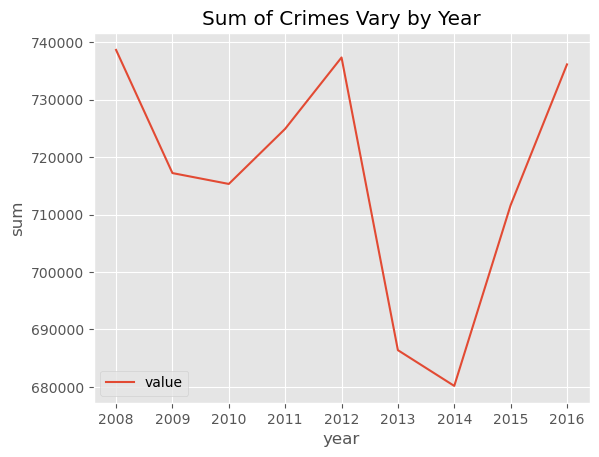

In [17]:
df_year.plot(kind='line')

plt.title('Sum of Crimes Vary by Year')
plt.xlabel('year')
plt.ylabel('sum')

plt.show()

Kita dapat melihat dengan jelas jumlah kriminalitas di Kota London mengalami penurunan pada tahun 2012 dan mulai meningkat kembali pada tahun 2014.

## Bagaimana Jumlah Setiap Kriminalitas Kategori Major dari Tahun ke Tahun?

Pertama-tama kita kelompokkan data berdasarkan year dan major category. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas pertahunnya dan perkategorinya. Supaya year dan major_category tidak menumpuk, kita dapat menggunakan unstack(). Lalu lakukan transpose() agar kolom year menjadi indexnya.

In [18]:
df_maj_ctg_year = pd.DataFrame(
    df_crimes.groupby(['major_category','year'])['value'].sum().unstack().transpose()
)
df_maj_ctg_year

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Selanjutnya, kita akan memplot plot garis dengan menambahkan .plot() ke df_maj_ctg_year dataframe. Jangan lupa untuk memberi judul, label sumbu x dan y.

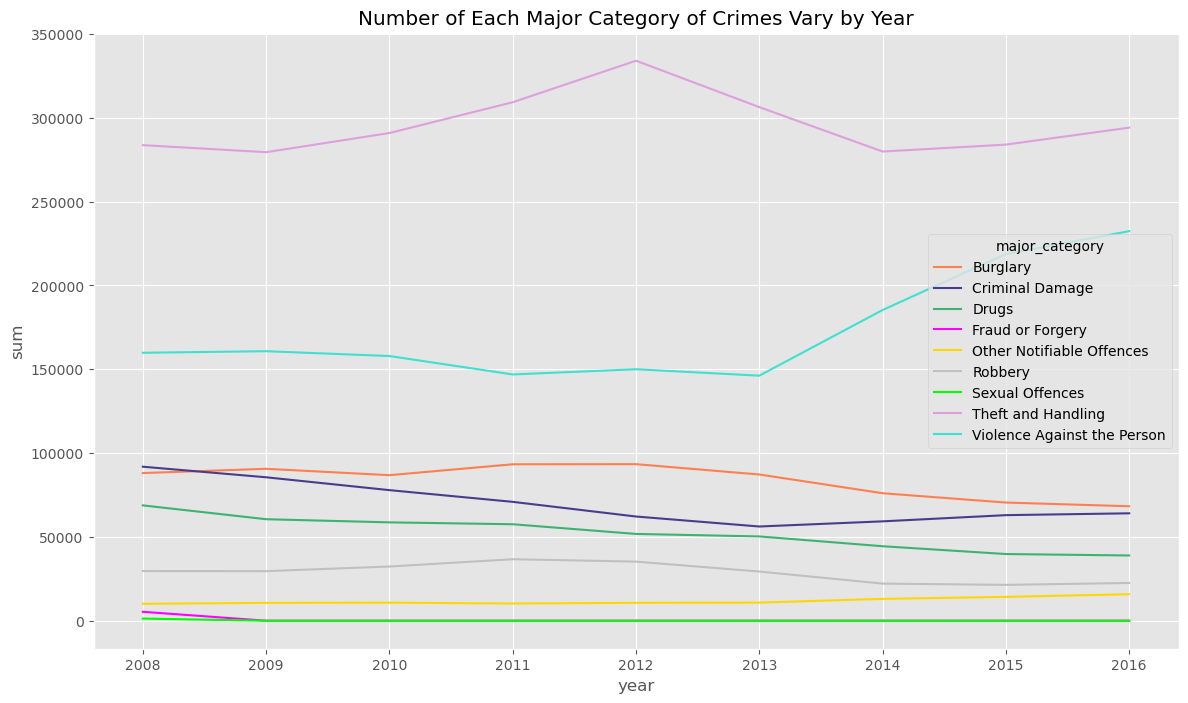

In [19]:
df_maj_ctg_year.plot(
    kind='line', 
    figsize=(14, 8), 
    color=['coral', 'darkslateblue', 'mediumseagreen', 'magenta', 'gold', 'silver', 'lime', 'plum', 'turquoise']
)
plt.title('Number of Each Major Category of Crimes Vary by Year')
plt.ylabel('sum')
plt.xlabel('year')

plt.show()

Seperti yang kita lihat, Theft and Handling menjadi kejahatan yang paling banyak terjadi di Kota London selama bertahun-tahun. Untuk kejahatan Violence Against the Person mengalami peningkatan secara drastis dari tahun 2013. Berbeda dengan Violence Against the Person, kejahatan lainnya tetap stabil selama bertahun-tahun.

## Bagaimana Jumlah Kriminalitas Setiap Tahunnya Berdasarkan Bulan?

Pertama-tama kita kelompokkan data berdasarkan year dan month. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas pertahunnya dan perbulannya. Supaya year dan month tidak menumpuk, kita dapat menggunakan unstack(). Lalu lakukan transpose() agar kolom month menjadi indexnya.

In [20]:
df_year_month = pd.DataFrame(
    df_crimes.groupby(['year', 'month'])['value'].sum().unstack().transpose()
)
df_year_month

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
1,65419,59142,54934,57966,62436,58933,55515,57055,58847
2,62626,54706,55069,54895,56735,55271,51222,53316,56697
3,61343,63482,63629,61282,67537,57590,57669,60096,59167
4,59640,59181,60085,58714,58801,55678,53467,56445,58637
5,62587,62897,62126,62630,64344,56765,56327,61038,63990
6,62290,63116,62632,61822,62281,56839,57039,60760,62262
7,64126,63281,63764,62428,63280,60508,58564,61606,65519
8,59959,58695,59040,59117,62143,57467,55641,58056,62666
9,58414,57847,59731,58640,56912,54924,56933,57564,61412


Selanjutnya, kita akan memplot plot garis dengan menambahkan .plot() ke df_year_month dataframe. Jangan lupa untuk memberi judul, label sumbu x dan y.

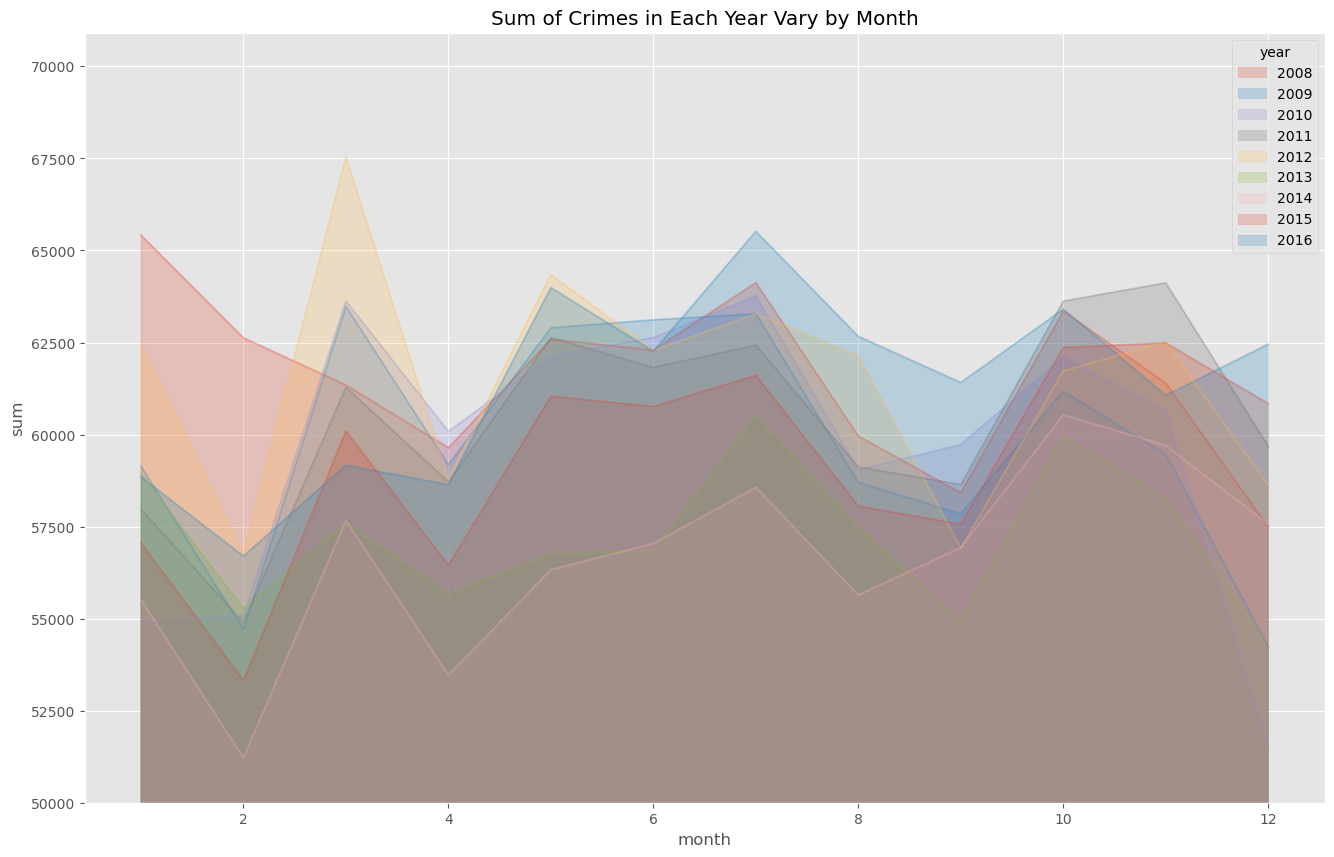

In [21]:
df_year_month.plot(
    kind='area',
    alpha=0.25,
    stacked=False,
    figsize=(16, 10)
)
plt.title('Sum of Crimes in Each Year Vary by Month')
plt.ylabel('sum')
plt.xlabel('month')
plt.ylim(bottom=50000)

plt.show()

Kita dapat melihat secara keseluruhan jumlah kriminalitas di setiap tahunnya berubah dengan cara yang serupa. Pertama, di awal tahun, jumlah kriminalitas turun di bulan Februari, naik ke titik yang relatif tinggi di bulan Maret dan kemudian turun lagi di bulan April. Setelah itu secara keseluruhan jumlah kriminalitas mengalami pasang surut dengan dua titik terendah di bulan September dan Desember.

## Berapa Distribusi Frekuensi Jumlah Kriminalitas dari Wilayah London Setiap Tahunnya?

Pertama-tama kita kelompokkan data berdasarkan borough dan year. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas perwilayahnya dan pertahunnya. Supaya borough dan year tidak tumpang tindih, kita dapat menggunakan unstack(). Lalu lakukan transpose() agar kolom borough menjadi indexnya.

In [22]:
df_borough_year = pd.DataFrame(
    df_crimes.groupby(['borough', 'year'])['value'].sum().unstack()
)
df_borough_year.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Selanjutnya mari dapatkan range bin dan jumlah frekuensi dengan menggunakan metode Numpy's histogram.

In [23]:
count, bin_edges = np.histogram(df_borough_year)

print(count)
print(bin_edges)

[  9  30  43 101  75  30   0   0   6   3]
[    0.   5922.6 11845.2 17767.8 23690.4 29613.  35535.6 41458.2 47380.8
 53303.4 59226. ]


Sekarang mari buat grafik distribusi dengan meneruskan kind='hist' ke plot().

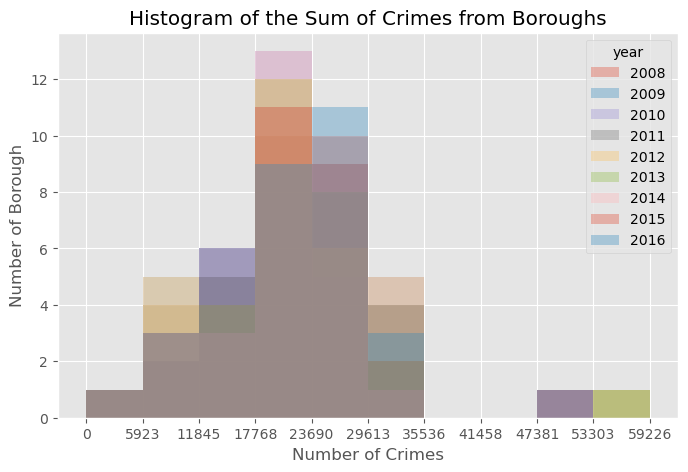

In [24]:
df_borough_year.plot(
    kind='hist',
    figsize=(8, 5),
    alpha=0.35,
    xticks=bin_edges,
    # color=['coral', 'darkslateblue', 'mediumseagreen']
)

plt.title('Histogram of the Sum of Crimes from Boroughs')
plt.ylabel('Number of Borough')
plt.xlabel('Number of Crimes')

plt.show()

Dapat kita lihat, secara keseluruhan setiap tahunnya beberapa wilayah mencatat jumlah kriminalitas di range 0-5923, 5923-11845, dan seterusnya, tetapi tidak ada daerah yang mencatat jumlah kriminalitas pada range 35536-41458 dan 42458-47381 di tahun berapa pun.

## Bagaimana Jumlah 5 Kriminalitas Kategori Major Tertinggi di Setiap Wilayah London?

Pertama-tama kita kelompokkan data berdasarkan borough dan major_category. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas perwilayahnya dan perkategorinya. Supaya borough dan major_category tidak tumpang tindih, kita dapat menggunakan unstack().

In [25]:
df_borough_maj_ctg = pd.DataFrame(
    df_crimes.groupby(['borough', 'major_category'])['value'].sum().unstack()
)
df_borough_maj_ctg.head()

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,18103.0,18888.0,9188.0,205.0,2819.0,6105.0,49.0,50999.0,43091.0
Barnet,36981.0,21024.0,9796.0,175.0,2953.0,7374.0,38.0,87285.0,46565.0
Bexley,14973.0,17244.0,7346.0,106.0,1999.0,2338.0,22.0,40071.0,30037.0
Brent,28923.0,20569.0,25978.0,157.0,3711.0,12473.0,39.0,72523.0,63178.0
Bromley,27135.0,24039.0,8942.0,196.0,2637.0,4868.0,31.0,69742.0,46759.0


Kemudian kita cari 5 kriminalitas kategori major tertinggi. Caranya dari dataframe df_crimes kita kelompokkan berdasarkan major_category lalu jumlahkan. Urutkan data berdasarkan value menggunakan sort_values(). Jangan lupa untuk membuat nilai ascending menjadi False agar data diurutkan dari terbesar ke terkecil. Terakhir gunakan head() untuk menampilkan data dari 5 teratas.

In [26]:
df_crimes.groupby('major_category').sum().sort_values(['value'], ascending=False)['value'].head()

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Name: value, dtype: int64

Dapat kita lihat 5 kriminalitas kategori major adalah Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, dan Drugs.

Sekarang kita akan memplot plot garis dengan menambahkan .plot() ke df_borough_maj_ctg[['Burglary', 'Criminal Damage', 'Drugs', Theft and Handling', 'Violence Against the Person']] dataframe. Gunakan kind='barh' untuk membuat bar chart menjadi horizontal.

<AxesSubplot:ylabel='borough'>

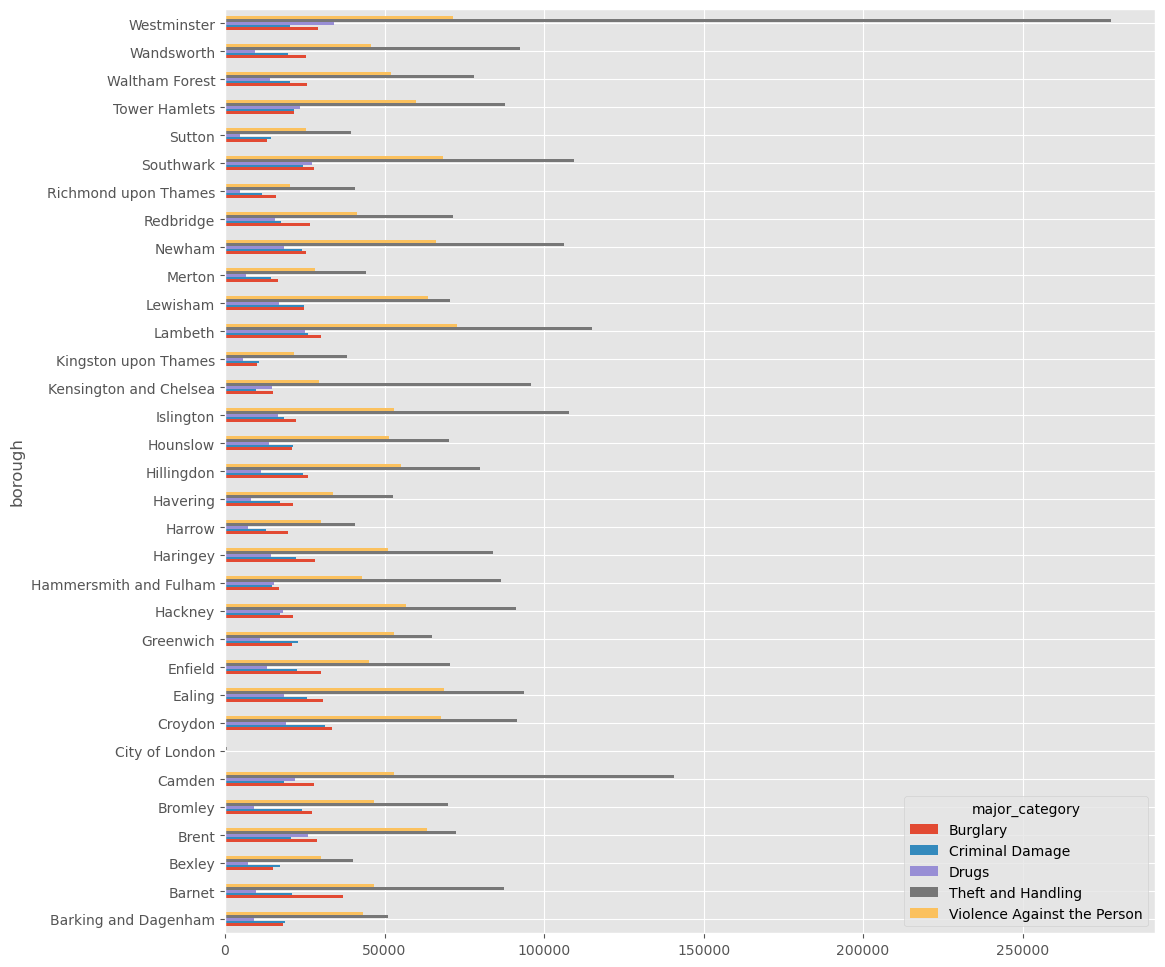

In [27]:
df_borough_maj_ctg[[
    'Burglary', 
    'Criminal Damage', 
    'Drugs', 
    'Theft and Handling', 
    'Violence Against the Person'
]].plot(
    kind='barh', figsize=(12, 12)
)

Dapat kita lihat, 5 kriminalitas kategori major tertinggi paling banyak terjadi di wilayah Westminster dan sedikit terjadi di wilayah City of London. Secara keseluruhan Theft and Handling menjadi kriminalitas paling banyak terjadi di seluruh wilayah London.

## Kriminalitas Kategori Major Apa yang Paling Banyak Terjadi di London?

Pertama-tama kita kelompokkan data berdasarkan major_category. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas perkategorinya.

In [28]:
df_maj_ctg = pd.DataFrame(
    df_crimes.groupby(['major_category'])['value'].sum()
)
df_maj_ctg

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


Selanjutnya buat list colors_list dan explode_list. colors_list ini akan memberikan warna khusus untuk kriminalitas kategori major. Sedangkan explode_list akan meng-explode pie chart untuk menunjukan 4 kriminalitas terendah kategori major.

In [29]:
colors_list=['coral', 'darkslateblue', 'mediumseagreen', 'magenta', 'gold', 'silver', 'lime', 'plum', 'turquoise']
explode_list = [0, 0, 0, 0.2, 0.1, 0.05, 0.3, 0, 0]

Sekarang kita plot data df_maj_ctg['value']. Kita akan passing kind='pie', bersama dengan parameter tambahan berikut:
- autopct, digunakan untuk memberi label pada irisan dengan nilai numerik.
- startangle, digunakan untuk menentukan start angle dari pie chart.
- Hilangkan label pada pie chart, dan tambahkan legend menggunakan plt.legend().
- Letakkan presentase di luar pie chart dengan menggunakan parameter pctdistance.
- Jangan lupa tambahkan parameter colors dan explode

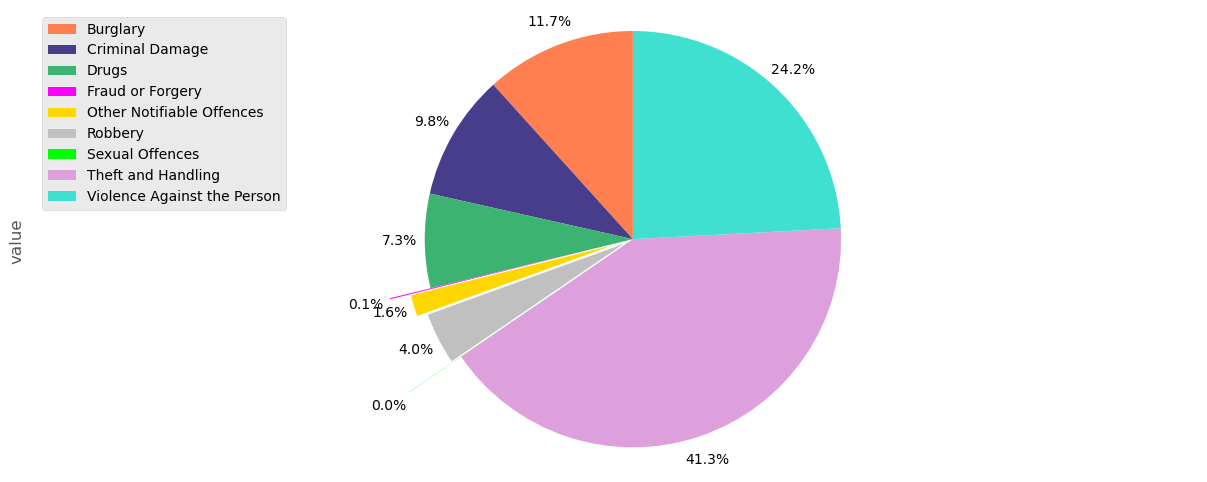

In [30]:
df_maj_ctg['value'].plot(
    kind='pie', 
    figsize=(15, 6), 
    autopct='%1.1f%%', 
    startangle=90,
    labels=None,
    pctdistance=1.12,
    explode=explode_list, 
    colors=colors_list
)

plt.axis('equal')
plt.legend(labels=df_maj_ctg.index, loc='upper left')
plt.show()

Bisa kita lihat, hampir setengah kriminalitas di London adalah kategori Theft and Handling. Fraud or Forgery menjadi kriminalitas yang paling jarang terjadi di London.

## Bagaimana Perbandingan Tren Jumlah Kriminalitas Antara 5 Wilayah di London yang Memiliki Jumlah Kriminalitas Tertinggi?

Pertama-tama kita kelompokkan data berdasarkan borough. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas perwilayahnya.

In [32]:
df_borough = pd.DataFrame(
    df_crimes.groupby('borough')['value'].sum()
)
df_borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


Selanjutnya kita urutkan data tersebut berdasarkan values menggunakan sort_values(). Jangan lupa untuk membuat nilai ascending menjadi False agar data diurutkan dari terbesar ke terkecil. Terakhir gunakan head() untuk menampilkan data dari 5 teratas.

In [43]:
borough_top5 = df_borough.sort_values(['value'], ascending=False).head()

Sekarang kita sudah mendapatkan 5 wilayah dengan jumlah kriminalitas tertinggi.

In [38]:
borough_top5

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


Kemudian dari dataframe df_borough_year, kita ambil kolom 5 wilayah dengan jumlah kriminalitas tertinggi.

In [39]:
df_borough_year_top5 = df_borough_year.transpose()[borough_top5.index]
df_borough_year_top5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


Sekarang kita plot data df_borough_year_top5. Kita akan passing kind='box'. Jangan lupa tambahkan judul dan label y.

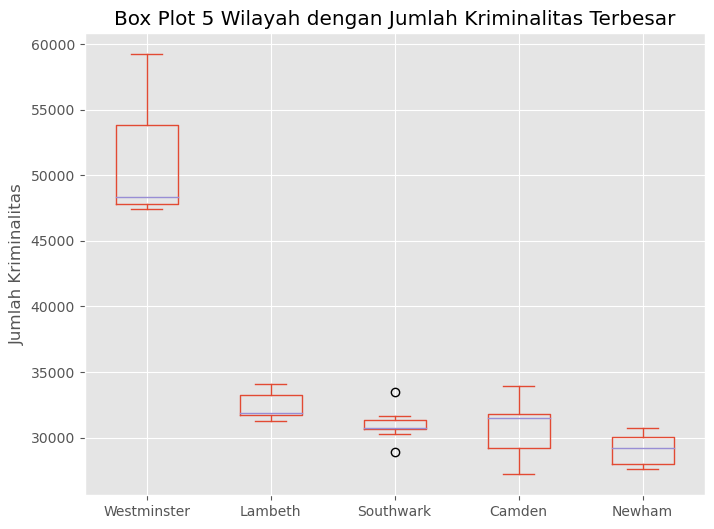

In [40]:
df_borough_year_top5.plot(
    kind='box',
    figsize=(8, 6)
)

plt.title('Box Plot 5 Wilayah dengan Jumlah Kriminalitas Terbesar')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

Bisa kita lihat, wilayah Westminster memiliki rata-rata jumlah kriminalitas paling tinggi yaitu berkisar di 50000-51000. Berbeda dengan wilayah lainnya yang hampir memiliki rata-rata yang sama, yaitu berkisar di 29000-33000. Ini menunjukkan wilayah Westminster memiliki tren jumlah kriminalitas yang berbeda, sedangkan wilayah Lambeth, Southwark, Camden, dan Newham memiliki tren jumlah kriminalitas yang hampir sama. Untuk lebih detailnya kita dapat memanggil metode describe() pada dataframe.

In [45]:
df_borough_year_top5.describe()

borough,Westminster,Lambeth,Southwark,Camden,Newham
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50558.666667,32464.222222,30978.777778,30571.888889,29113.777778
std,4201.683918,1014.515005,1215.293049,2121.547633,1119.162385
min,47395.000000,31225.000000,28912.000000,27198.000000,27577.000000
25%,47846.000000,31717.000000,30623.000000,29183.000000,28005.000000
50%,48330.000000,31868.000000,30737.000000,31472.000000,29217.000000
75%,53852.000000,33224.000000,31320.000000,31804.000000,30067.000000
max,59226.000000,34071.000000,33470.000000,33956.000000,30728.000000


## Bagaimana tren kriminalitas di London untuk Tahun 2008-2016?

Pertama-tama kita reset index dari df_year dataframe. Kita jadikan year sebagai kolom lagi.

In [46]:
df_year.reset_index(inplace=True)

Kemudian rename kolom.

In [47]:
df_year.columns = ['year', 'total']

Kita cek dataframe kita.

In [48]:
df_year

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Selanjutnya plot datanya. Kita dapat membuat kumpulan scatter plot dengan meneruskan kind='scatter' sebagai argumen plot. Jangan lupa memasukkan kata kunci x dan y untuk menentukan kolom yang berada pada sumbu x dan y.

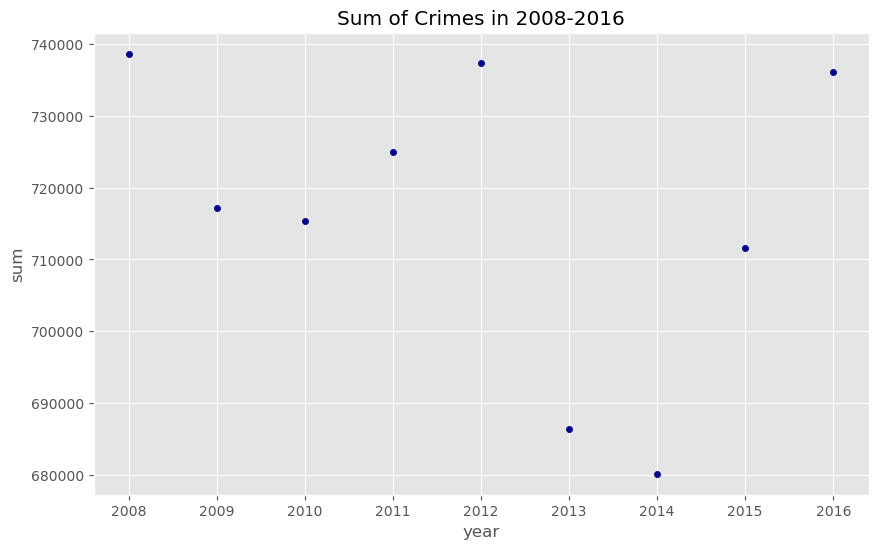

In [49]:
df_year.plot(
    kind='scatter', 
    x='year', 
    y='total', 
    figsize=(10, 6), 
    color='darkblue'
)

plt.title('Sum of Crimes in 2008-2016')
plt.xlabel('year')
plt.ylabel('sum')

plt.show()

Kita dapat mengamati tren kriminalitas di London. Jumlah kriminalitas di London terus mengalami penurunan dan peningkatan. Penurunan paling drastis terjadi pada tahun 2013, dan peningkatan paling drastis dimulai dari tahun 2014.

## Di Wilayah Mana Kriminalitas dengan Jumlah Terkecil Sering Muncul?

Kita akan mencoba menggunakan word clouds. Pertama-tama mari instal package-nya kemudian import.

In [50]:
from wordcloud import WordCloud, STOPWORDS

Langkah selanjutnya mari kelompokkan data berdasarkan minor_category lalu jumlahkan. Kemudian urutkan data dari terkecil ke terbesar. Munculkan 5 data teratas.

In [53]:
df_min_ctg = pd.DataFrame(
    df_crimes.groupby('minor_category').sum().sort_values(['value'])['value'].head()
)

Kita sudah mendapatkan 5 kriminalitas terkecil kategori minor. Bisa dilihat Rape merupakan kriminalitas dengan jumlah terkecil. Mari kita lihat di wilayah mana kejahatan Rape sering muncul.

In [54]:
df_min_ctg

,value
minor_category,
Rape,268
Murder,949
Other Sexual,1005
Other Fraud & Forgery,1485
Other Drugs,2998


Selanjutnya dapatkan list wilayah dimana kejahatan kategori Rape muncul. Lalu ubah list tersebut menjadi string.

In [55]:
df_crimes[df_crimes['minor_category'] == 'Rape'].borough.values

array(['Brent', 'Greenwich', 'Lambeth', ..., 'Hackney', 'Newham',
       'Waltham Forest'], dtype=object)

In [56]:
listToStr = ' '.join([str(elem) for elem in df_crimes[df_crimes['minor_category'] == 'Rape'].borough.values])

Mari gunakan stopwords yang kita impor dari word_cloud. Kita menggunakan set untuk menghapus stopword yang berlebihan.

In [57]:
stopwords = set(STOPWORDS)

Buat word cloud object dan generate word cloud.

In [58]:
borough_wc = WordCloud(
    background_color='white',
    stopwords=stopwords
)

borough_wc.generate(listToStr)

Setelah word cloud dibuat, sekarang mari kita visualisasikan.

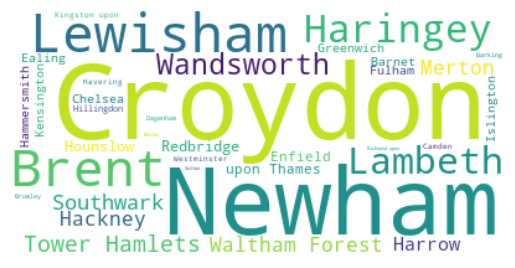

In [59]:
plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menurut word cloud diatas, kejahatan Rape paling sering muncul di wilayah Croydon.

## London Map

Pertama-tama kita instal folium terlebih dahulu kemudian kita import.

In [66]:
import folium

Kemudian buat variable yang bernilai latitude dan longitude dari London.

In [67]:
# london latitude and longitude values
latitude = 51.5286417
longitude = -0.1015987

Mari cek df_borough dataframe.

In [61]:
df_borough.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


 Kemudian reset index dari df_borough dataframe. Kita jadikan borough sebagai kolom lagi.

In [63]:
df_borough.reset_index(inplace=True)

In [64]:
df_borough.head()

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349


Kita akan membuat peta Choropleth. Untuk membuatnya kta membutuhkan file GeoJSON yang mendefinisikan batas-batas wilayah London. Mari unduh file GeoJSON terlebih dahulu.

Sekarang setelah kita memiliki file GeoJSON, mari buat peta London, berpusat di nilai lintang dan bujur London, dengan tingkat zoom awal 11, dan menggunakan gaya Mapbox Bright.

In [72]:
london_geo = r'london_boroughs.json'

london_map = folium.Map(
    location=[latitude, longitude], 
    zoom_start=11, 
    tiles="https://api.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png?access_token=mytoken", 
    attr="Mapbox attribution"
)

london_map.choropleth(
    geo_data=london_geo, 
    data=df_borough, 
    columns=['borough', 'value'], 
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2, 
    legend_name='Jumlah Kriminalitas'
)

london_map